# Chest X-ray Classification

The project architecture is as follows:

| Root | Directory / File | Description |
|------|------------------|-------------|
| `./` | `config.py` | Configuration file for the project. |
| `./` | `main.ipynb` | Main Jupyter notebook for running the project. |
| `src/` | `models/` | Directory containing model definitions. |
| `src/` | `datasets/` | Directory containing dataset definitions. |
| `src/` | `utils/` | Directory containing utility functions. | 


## Installations

The project use Python 3.12.9

You can found urls to download the datasets in the `datasets_urls.txt` file

In [1]:
%pip install -qr ./requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import importlib
import numpy as np
import matplotlib.pyplot as plt

# Import project modules
import config
import src.utils.display as display
import src.datasets.datasetHelper as datasetHelper
import src.datasets.SKDataLoader as SKDataLoader
import src.datasets.TFDataLoader as TFDataLoader

# Import all model types
import src.models.common.ModelInterface as ModelInterface
import src.models.common.SKModelInterface as SKModelInterface
import src.models.CNNModel as CNNModel
import src.models.ForestModel as ForestModel
import src.models.KNNModel as KNNModel
import src.models.SVMModel as SVMModel

2025-05-26 19:15:11.696057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748279711.708769    5650 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748279711.712694    5650 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748279711.722527    5650 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748279711.722543    5650 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748279711.722544    5650 computation_placer.cc:177] computation placer alr

## Config Loading and Visualization


Displaying class help: True
Dataset structure:
 - NORMAL images: data/chest_Xray/train/NORMAL
 - PNEUMONIA images (Bacteria & virus): data/chest_Xray/train/PNEUMONIA

Showing NORMAL images...


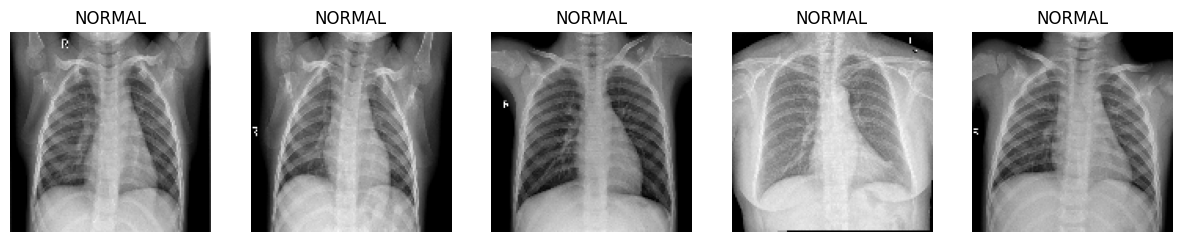


Showing BACTERIA images...


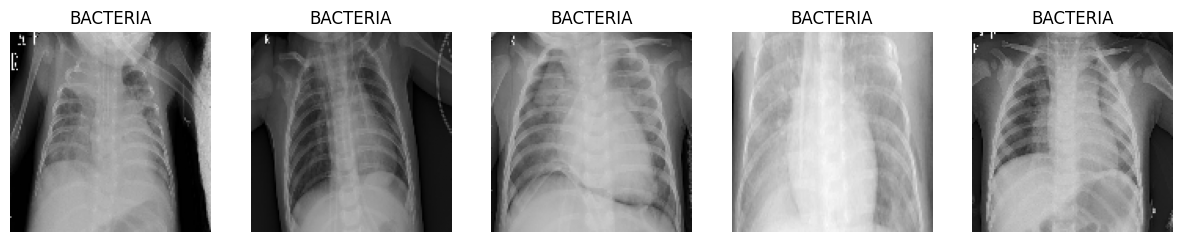


Showing VIRUS images...


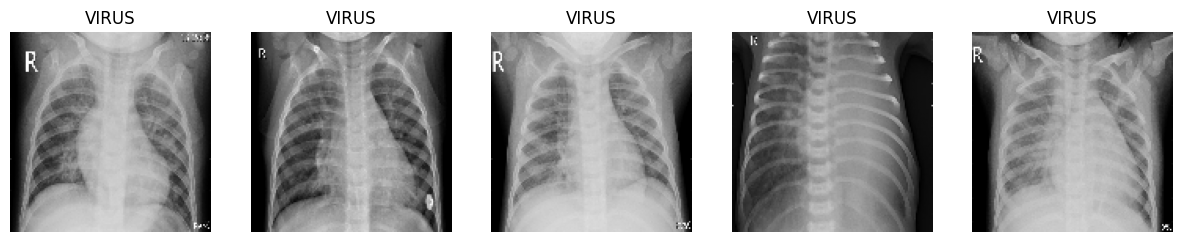

In [3]:
from config import DISPLAY_CLASS_HELP
importlib.reload(config)

print("Displaying class help:", DISPLAY_CLASS_HELP)

print("Dataset structure:")
print(f" - NORMAL images: {config.TRAIN_PATH / 'NORMAL'}")
print(
    f" - PNEUMONIA images (Bacteria & virus): {config.TRAIN_PATH / 'PNEUMONIA'}")

# Visualize sample images from each class
importlib.reload(display)
display.show_sample_images(3, category="train")

## Data Preparation

In [4]:
importlib.reload(datasetHelper)
importlib.reload(TFDataLoader)
importlib.reload(SKDataLoader)

if DISPLAY_CLASS_HELP:
    help(datasetHelper)
    help(TFDataLoader)
    help(SKDataLoader)

(x_tf_train, y_tf_train), (x_tf_val, y_tf_val), (x_tf_test,
                                                 y_tf_test) = TFDataLoader.load_data_with_validation()

(x_sk_train, y_sk_train), (x_sk_test, y_sk_test) = SKDataLoader.load_data()

Help on module src.datasets.datasetHelper in src.datasets:

NAME
    src.datasets.datasetHelper

FUNCTIONS
    categorize_labels(**y: numpy.ndarray) -> list[numpy.ndarray]
        Resize labels to categorical format.

    load_dataset(category: Literal['train', 'test'] = 'train', flatten: bool = False, print_repartition: bool = False) -> tuple[numpy.ndarray, numpy.ndarray]
        Load images from NORMAL, BACTERIA, and VIRUS classes.

        Args:
            category (str): The category of images to load (train or test).
            flatten (bool): Whether to flatten the images or not.
            print_repartition (bool): Whether to print the class distribution.

        Returns:
            tuple (ndarray, ndarray): A tuple containing the images and their corresponding labels.

    resize_images(**x: numpy.ndarray) -> list[numpy.ndarray]
        Resize images to the specified dimensions.
        Then normalize the images to have pixel values between 0 and 1 to improve performance (

I0000 00:00:1748279730.509323    5650 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6166 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Loading training data...
Class distribution in train: {'NORMAL': 1341, 'BACTERIA': 2530, 'VIRUS': 1345}
Loading test data...
Class distribution in test: {'NORMAL': 234, 'BACTERIA': 242, 'VIRUS': 148}
Data loading complete!
Applying data augmentation...


## Model Training and Evaluation

### CNN Model training

In [5]:
from typing import Dict, Literal

importlib.reload(CNNModel)

tf_models: list[CNNModel.CNNModel] = [
    CNNModel.CNNModel()
]

tf_scores: list[Dict[Literal["accuracy", "precision", "recall", "f1_score"], float | np.floating | np.ndarray]] = []

tf_datas: list[dict[Literal["predictions", "y_true"], np.ndarray]] = []

for model in tf_models:
    print("\n" + "="*50)

    print(model.name + " MODEL TRAINING")

    print("="*50)

    print(model.summary())

    model.fit(x_tf_train, y_tf_train, x_tf_val, y_tf_val)

    [score, data] = model.evaluate(x_tf_test, y_tf_test)
    tf_scores.append(score)
    tf_datas.append(data)


/home/rafi-epitech/Documents/Projects/T-DEV-810-NAN_7/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



CNNModel MODEL TRAINING


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 5,369,955 (20.48 MB)

 Trainable params: 5,368,483 (20.48 MB)

 Non-trainable params: 1,472 (5.75 KB)

None
(8344, 128, 128, 1)


2025-05-26 19:15:52.298843: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 546832384 exceeds 10% of free system memory.
2025-05-26 19:15:52.736053: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 546832384 exceeds 10% of free system memory.


Epoch 1/30


I0000 00:00:1748279755.632420    5740 service.cc:152] XLA service 0x74c244007780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748279755.632439    5740 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-05-26 19:15:55.695991: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748279756.115466    5740 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.3930 - loss: 1.8282 

I0000 00:00:1748279764.693856    5740 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5481 - loss: 1.1180
Epoch 1: val_accuracy improved from -inf to 0.46648, saving model to best_model.h5


261/261 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.5483 - loss: 1.1173 - val_accuracy: 0.4665 - val_loss: 1.7173 - learning_rate: 1.0000e-04
Epoch 2/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6649 - loss: 0.7619
Epoch 2: val_accuracy did not improve from 0.46648
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6650 - loss: 0.7617 - val_accuracy: 0.3017 - val_loss: 1.3897 - learning_rate: 1.0000e-04
Epoch 3/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6966 - loss: 0.6689
Epoch 3: val_accuracy improved from 0.46648 to 0.75575, saving model to best_model.h5


261/261 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6965 - loss: 0.6688 - val_accuracy: 0.7557 - val_loss: 0.5631 - learning_rate: 1.0000e-04
Epoch 4/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7243 - loss: 0.5887
Epoch 4: val_accuracy improved from 0.75575 to 0.76628, saving model to best_model.h5


261/261 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7243 - loss: 0.5887 - val_accuracy: 0.7663 - val_loss: 0.5345 - learning_rate: 1.0000e-04
Epoch 5/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7375 - loss: 0.5657
Epoch 5: val_accuracy improved from 0.76628 to 0.80268, saving model to best_model.h5


261/261 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7375 - loss: 0.5657 - val_accuracy: 0.8027 - val_loss: 0.4614 - learning_rate: 1.0000e-04
Epoch 6/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7428 - loss: 0.5384
Epoch 6: val_accuracy improved from 0.80268 to 0.80651, saving model to best_model.h5


261/261 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7428 - loss: 0.5384 - val_accuracy: 0.8065 - val_loss: 0.4544 - learning_rate: 1.0000e-04
Epoch 7/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7450 - loss: 0.5199
Epoch 7: val_accuracy improved from 0.80651 to 0.81130, saving model to best_model.h5


261/261 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7450 - loss: 0.5200 - val_accuracy: 0.8113 - val_loss: 0.4539 - learning_rate: 1.0000e-04
Epoch 8/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7608 - loss: 0.4873
Epoch 8: val_accuracy did not improve from 0.81130
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7608 - loss: 0.4874 - val_accuracy: 0.7998 - val_loss: 0.4668 - learning_rate: 1.0000e-04
Epoch 9/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7597 - loss: 0.4871
Epoch 9: val_accuracy improved from 0.81130 to 0.81801, saving model to best_model.h5


261/261 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7597 - loss: 0.4871 - val_accuracy: 0.8180 - val_loss: 0.4408 - learning_rate: 1.0000e-04
Epoch 10/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7681 - loss: 0.4645
Epoch 10: val_accuracy did not improve from 0.81801
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7681 - loss: 0.4645 - val_accuracy: 0.8113 - val_loss: 0.4593 - learning_rate: 1.0000e-04
Epoch 11/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7893 - loss: 0.4308
Epoch 11: val_accuracy did not improve from 0.81801
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7893 - loss: 0.4309 - val_accuracy: 0.8123 - val_loss: 0.4339 - learning_rate: 1.0000e-04
Epoch 12/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7894 - loss: 0.4416
Epoch 12: val_accuracy improved from 0.81801 to 0.81897, saving model to best_model.h5


261/261 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7894 - loss: 0.4416 - val_accuracy: 0.8190 - val_loss: 0.4127 - learning_rate: 1.0000e-04
Epoch 13/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7893 - loss: 0.4300
Epoch 13: val_accuracy did not improve from 0.81897
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7893 - loss: 0.4300 - val_accuracy: 0.7979 - val_loss: 0.4652 - learning_rate: 1.0000e-04
Epoch 14/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7946 - loss: 0.4203
Epoch 14: val_accuracy did not improve from 0.81897
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7946 - loss: 0.4203 - val_accuracy: 0.8161 - val_loss: 0.4149 - learning_rate: 1.0000e-04
Epoch 15/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8010 - loss: 0.3972
Epoch 15: val_accuracy did not improve from 0.81897
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8010 - loss: 0.3972 - val_accuracy: 0.7835 - val_loss: 0.4709 - learning_rate: 1.0000

261/261 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8025 - loss: 0.3850 - val_accuracy: 0.8209 - val_loss: 0.4096 - learning_rate: 1.0000e-04
Epoch 18/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8225 - loss: 0.3708
Epoch 18: val_accuracy did not improve from 0.82088
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8225 - loss: 0.3708 - val_accuracy: 0.8190 - val_loss: 0.4321 - learning_rate: 1.0000e-04
Epoch 19/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8162 - loss: 0.3751
Epoch 19: val_accuracy did not improve from 0.82088
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8162 - loss: 0.3751 - val_accuracy: 0.8190 - val_loss: 0.4214 - learning_rate: 1.0000e-04
Epoch 20/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8393 - loss: 0.3455
Epoch 20: val_accuracy did not improve from 0.82088
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8393 - loss: 0.3455 - val_accuracy: 0.8170 - val_loss: 0.4359 - learning_rate: 1.0000

### Scikit-Learn Models training

In [6]:
from typing import Dict, Literal, Tuple

importlib.reload(SKModelInterface)
importlib.reload(ForestModel)
importlib.reload(SVMModel)
importlib.reload(KNNModel)

sk_models: list[SKModelInterface.SKModelInterface] = [
    KNNModel.KNNModel(),
    ForestModel.ForestModel(), SVMModel.SVMModel()
]

sk_scores: list[dict[Literal["accuracy", "precision", "recall", "f1_score"], float | np.floating | np.ndarray]] = []

sk_datas: list[dict[Literal["predictions", "y_true"], np.ndarray]] = []

for model in sk_models:
    print("\n" + "="*50)

    print(model.name + " MODEL TRAINING")

    print("="*50)

    print(model.summary())

    model.fit(x_sk_train, y_sk_train)

    [score, data] = model.evaluate(x_sk_test, y_sk_test)

    sk_scores.append(score)
    sk_datas.append(data)


KNN MODEL TRAINING
KNN Model Summary:
  - Number of neighbors (K): 5
  - PCA components: 100
  - Number of classes: 3
  - Model status: Not fitted
None
PCA explained variance ratio sum: 0.8594

Random Forest MODEL TRAINING
Random Forest Model Summary:
  bootstrap: True
  ccp_alpha: 0.0
  class_weight: None
  criterion: gini
  max_depth: 30
  max_features: sqrt
  max_leaf_nodes: None
  max_samples: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 1
  min_samples_split: 5
  min_weight_fraction_leaf: 0.0
  monotonic_cst: None
  n_estimators: 150
  n_jobs: None
  oob_score: False
  random_state: 42
  verbose: 0
  warm_start: False
None

SVM MODEL TRAINING
SVM Model Summary:
  C: 1.0
  class_weight: balanced
  dual: False
  fit_intercept: True
  intercept_scaling: 1
  loss: squared_hinge
  max_iter: 1000
  multi_class: ovr
  penalty: l2
  random_state: None
  tol: 0.0001
  verbose: 0
None
PCA reduced dimensions from 629 to 629


# Model Comparison and Visualization


MODEL COMPARISON
Model           Accuracy   Precision  Recall     F1 Score  
-------------------------------------------------------
CNNModel        0.7196     0.8035     0.7196     0.7106
KNN             0.6827     0.7327     0.6827     0.6768
Random Forest   0.7404     0.7734     0.7404     0.7349
SVM             0.6603     0.7210     0.6603     0.6418


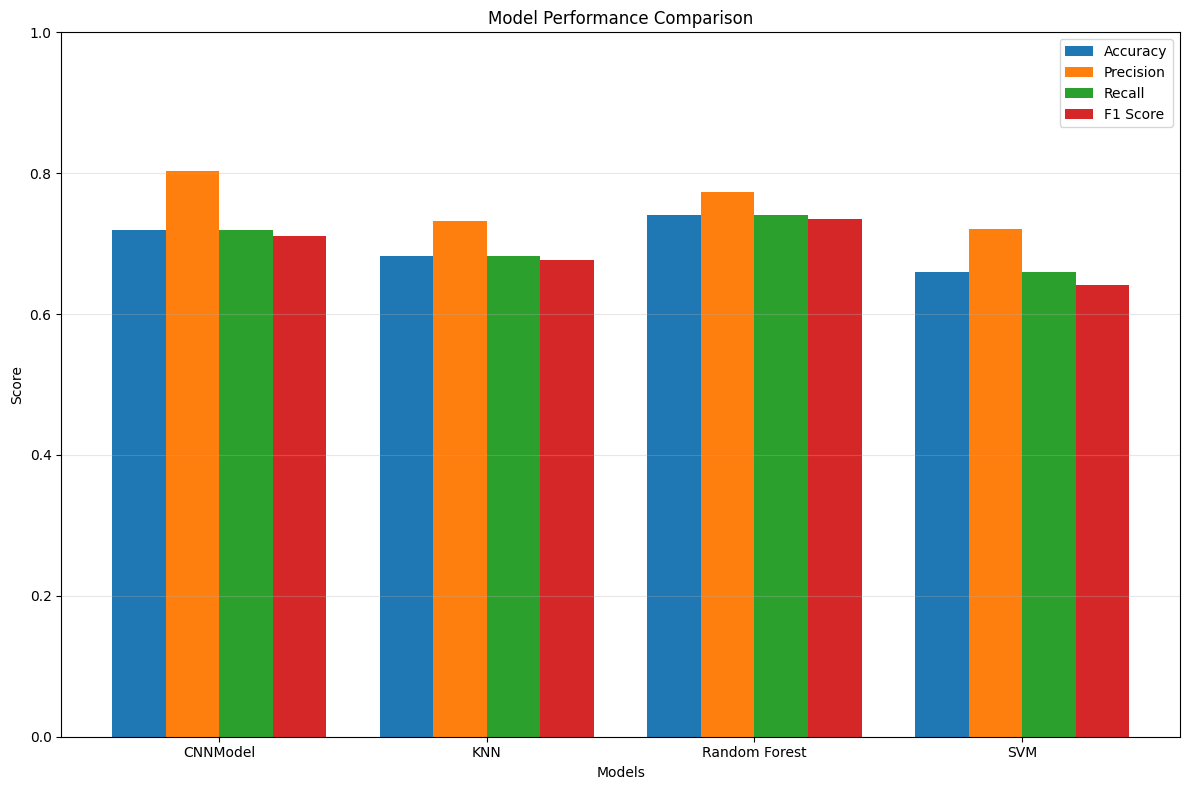

In [ ]:
models = tf_models + sk_models
scores = tf_scores + sk_scores
datas = tf_datas + sk_datas

# Create comparison table
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

print(f"{'Model':<15} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-" * 55)
for (model, score) in zip(models, scores):
    print(
        f"{model.name:<15} {score['accuracy']:.4f}     {score['precision']:.4f}     {score['recall']:.4f}     {score['f1_score']:.4f}")

# Plot metrics comparison
plt.figure(figsize=(12, 8))
x = np.arange(len(models))
width = 0.2

plt.bar(x - width*1.5, [float(score['accuracy']) for score in scores], width, label='Accuracy')
plt.bar(x - width/2, [float(score['precision']) for score in scores], width, label='Precision')
plt.bar(x + width/2, [float(score['recall']) for score in scores], width, label='Recall')
plt.bar(x + width*1.5, [float(score['f1_score']) for score in scores], width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, [model.name for model in models])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

# Confusion Matrices for All Models

<Figure size 2000x1500 with 0 Axes>

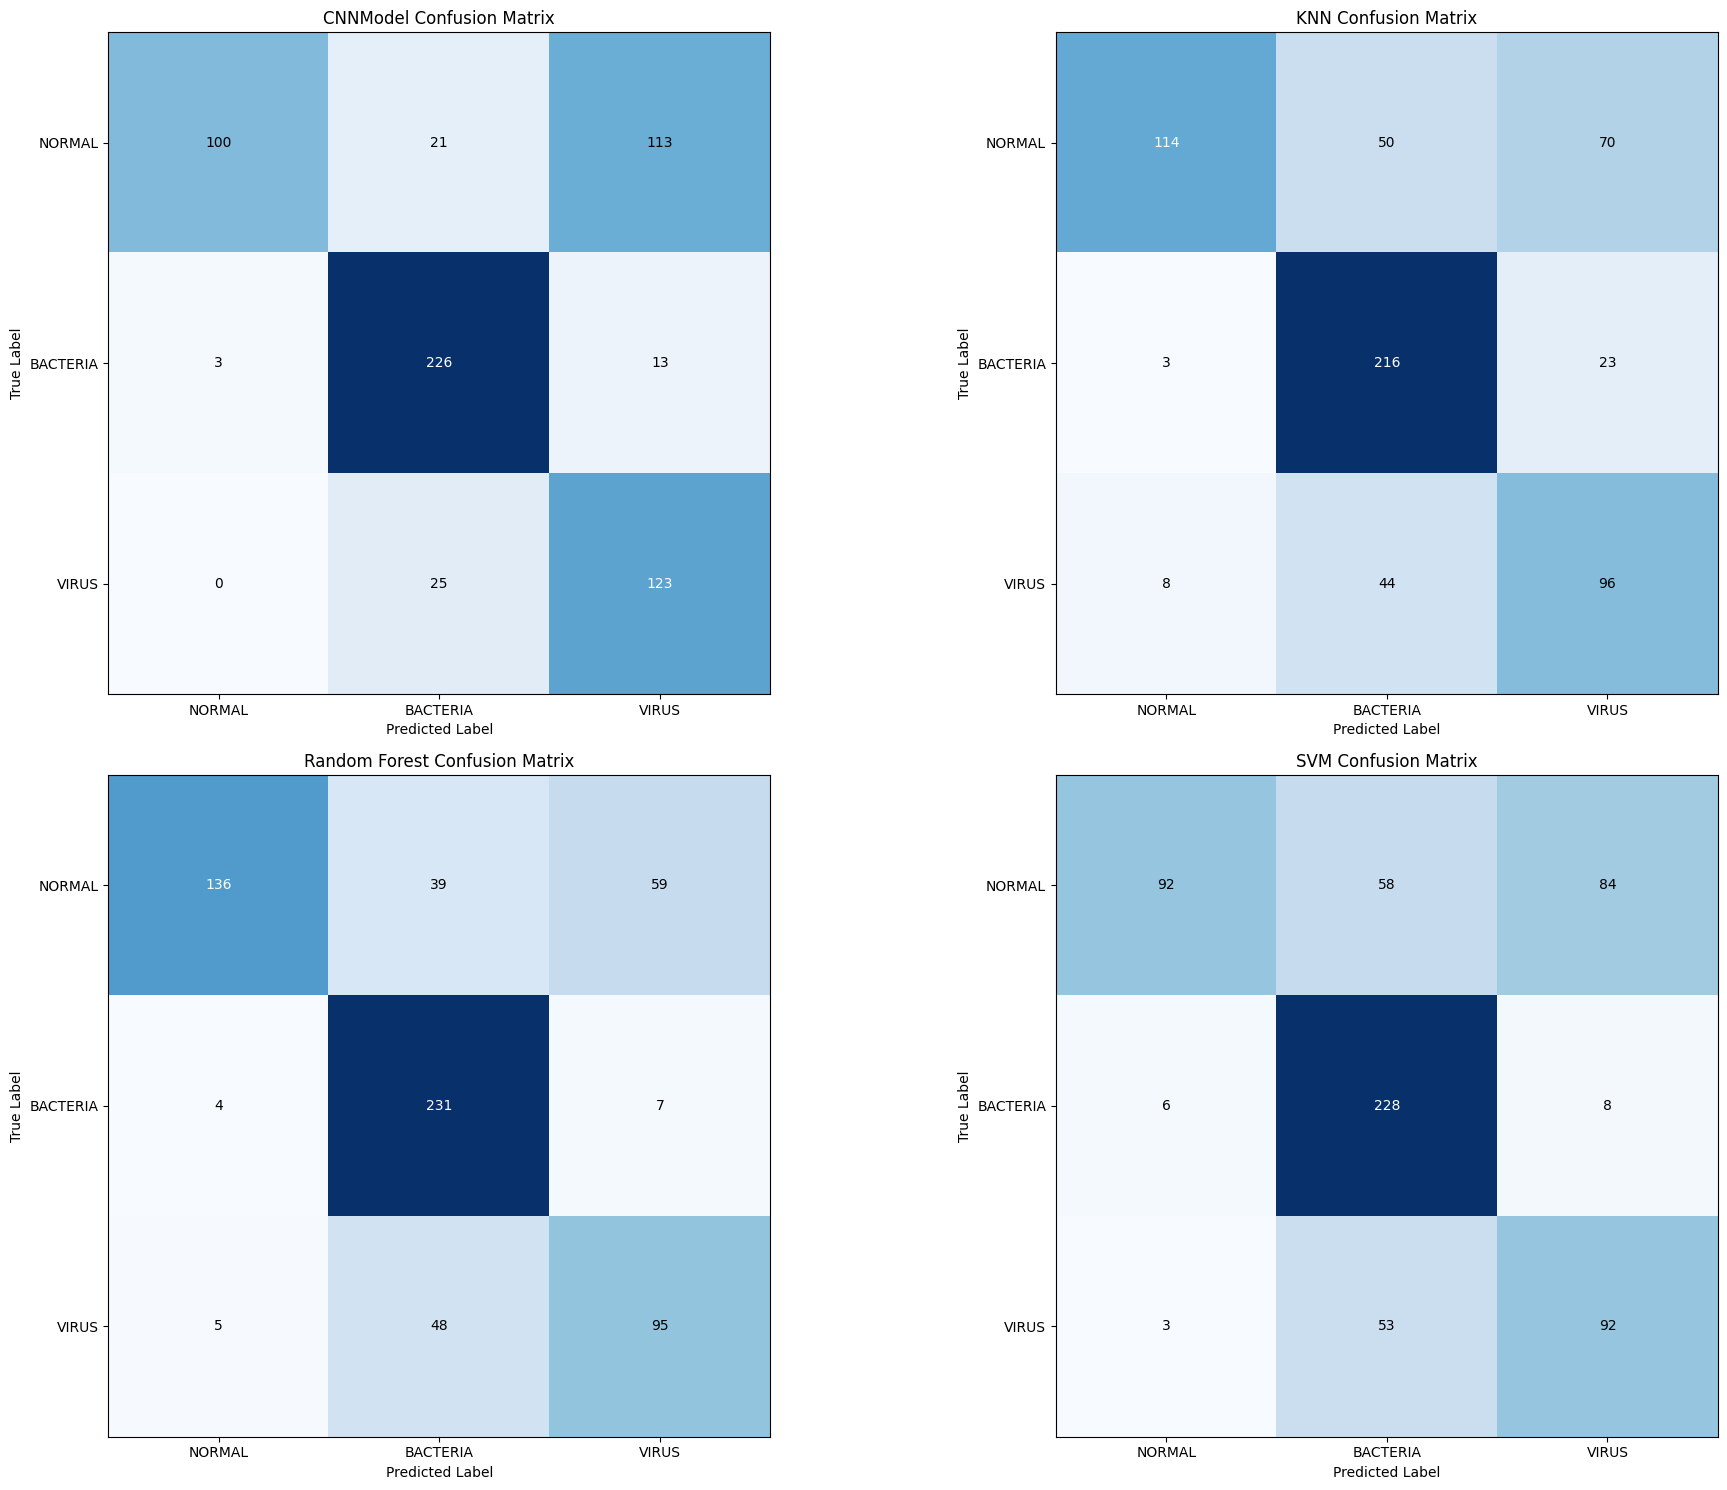

In [9]:
# Display confusion matrices for all models
plt.figure(figsize=(20, 15))
classes = ["NORMAL", "BACTERIA", "VIRUS"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, (model, data) in enumerate(zip(models, datas)):
    ax = axes[i]

    # Calculate the confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(data['y_true'], data['predictions'])
    
    # Plot the confusion matrix directly on the current axis
    im = ax.imshow(cm, cmap='Blues')
    ax.set_title(f"{model.name} Confusion Matrix")

    # Add tick marks and labels
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    # Label axes
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    # Add text annotations
    for i_row in range(len(classes)):
        for j_col in range(len(classes)):
            ax.text(j_col, i_row, str(cm[i_row, j_col]),
                    ha="center", va="center",
                    color="white" if cm[i_row, j_col] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Example predictions visualization


# This function is commented out because x_test is not equals for both TF and SK models.
# Todo
# def show_example_predictions(num_examples=5):
    # # Randomly select some test examples
    # indices = np.random.choice(len(x_test), num_examples, replace=False)

    # plt.figure(figsize=(15, num_examples * 2))

    # for i, idx in enumerate(indices):
        # img = X_test[idx]
        # true_label = classes[y_test_indices[idx]]

        # plt.subplot(num_examples, 5, i*5+1)
        # # Make sure we're reshaping correctly based on image dimensions
        # # If shape is (height, width, 1)
        # if len(img.shape) == 3 and img.shape[2] == 1:
            # plt.imshow(img[:, :, 0], cmap='gray')
        # elif len(img.shape) == 3 and img.shape[2] == 3:  # If RGB image
            # plt.imshow(img)
        # else:  # Grayscale without channel dimension
            # plt.imshow(img, cmap='gray')
        # plt.title(f"True: {true_label}")
        # plt.axis('off')

        # for j, model_name in enumerate(sk_models):
            # pred_label = classes[predictions[model_name][idx]]
            # color = 'green' if pred_label == true_label else 'red'

            # plt.subplot(num_examples, 5, i*5+j+2)
            # plt.text(0.5, 0.5, f"{model_name}\nPred: {pred_label}",
                     # horizontalalignment='center',
                     # verticalalignment='center',
                     # fontsize=10,
                     # color=color)
            # plt.axis('off')

    # plt.tight_layout()
    # plt.show()


# # Show example predictions
# show_example_predictions(5)

# Conclusion